# Import module and data genarator

In [1]:
import numpy
import random
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

seed = 7
random.seed(seed);
def generate_dataset_2():
    temp_list = []
    for i in range(0,1000,1):
        if (i < 500):
            temp_list.append([random.uniform(40,100),  random.uniform(50,100), 0])
        else:
            temp_list.append([random.uniform(0,50),  random.uniform(0,50), 1])
    return numpy.array(temp_list)

def generate_dataset_sample():
    temp_list = []
    for i in range(0,20,1):
        if (i < 10):
            temp_list.append([random.uniform(50,100),  random.uniform(50,100), 0])
        else:
            temp_list.append([random.uniform(0,50),  random.uniform(0,50), 1])
    return numpy.array(temp_list)

data = generate_dataset_2()
print(data)



[[59.42996589 57.5424587   0.        ]
 [79.05606838 53.62181433  0.        ]
 [72.15292026 68.28444585  0.        ]
 ...
 [46.84673527 31.66057581  1.        ]
 [40.46342968 44.21864822  1.        ]
 [44.23211144  1.71868275  1.        ]]


# Data Visualization


 plot: 



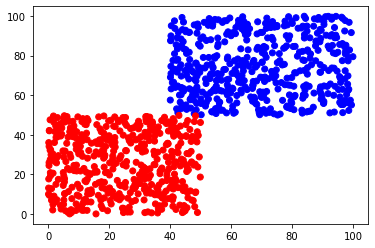

rows  1000 col 2 cluster  2


In [2]:

print("\n plot: \n")
def color_map(class_1):
    if class_1 == 0:
        return "Blue"
    elif class_1 == 1:
        return "Red"

color = [color_map(i) for i in data[:,2]]
#print(color)
plt.scatter(x=data[:,0], y=data[:,1], c=color)
plt.show()

X = data[:,0:2]
y = data[:,2]
#print(X)
rows, cols = X.shape
k = int(y.max() + 1)
print("rows ", rows, "col", cols, "cluster ", k)


# Helper functions 

In [3]:
def distance_between_points(x, y, n_features):
    d = 0
    for i in range(n_features):
        d = d + (x[i]- y[i])**2
    return numpy.sqrt(d)

def eu_distance(n_features, point, centriods):
    dist = []
    for c in centriods:
        d = distance_between_points(point, c, n_features)
        dist.append(d)
    return dist

def min_index(values):
    return values.index(min(values))

def max_index(values):
    return values.index(max(values))

def calculate_new_centriod_point(cluster):
    x1 = 0
    x2 = 0
    for i, j in cluster:
        x1 = x1 + float(i)
        x2 = x2 + float(j)
    return [x1/len(cluster),x2/len(cluster)]

def all_distance(X, centriods):
    distance = []
    n_samples, n_features = X.shape
    for point in X:
        dist = eu_distance(n_features, point, centriods)
        distance.append(dist)
    return distance

def calc_cluster(distance):
    mapped_clusters = []
    for dist in distance:
        mapped_clusters.append(min_index(dist))
    return mapped_clusters


# KMean++ centriod calculation

In [4]:
def max_distance_point(cluster_X, centroid):
    distance = all_distance(cluster_X, centroid)
    mapped_clusters = calc_cluster(distance)
    max_dist = 0;
    max_dist_point = []
    for point, dist, j in zip(cluster_X, distance,  mapped_clusters):
        if (float(dist[0]) > max_dist):
            max_dist = float(dist[0]);
            max_dist_point = point
    return max_dist, max_dist_point
    
def get_kmean_plusplus_centriods(X, n_clusters):
    centroids = []
    n_samples, n_features = X.shape
    index = random.uniform(0,n_samples)
    centroids.append(X[int(index)])
    for i in range(1, n_clusters):
        print(centroids)
        if i == 1:
            max_dist, max_dist_point = max_distance_point(X, centroids)
            centroids.append(max_dist_point)
    return centroids

# Plot helper function for centriod movement

In [5]:
def plot(X, centroids):
    plt.scatter(X[:, 0], X[:, 1], marker = '.', color = 'gray', label = 'data points')
    plt.scatter(x=centroids[0][0], y=centroids[0][1], color = 'red', label = 'first centriod')
    plt.scatter(centroids[1][0], centroids[1][1], color = 'blue', label = 'second centroid')
    plt.legend()
    plt.show()

# KMean new centriod calculation algo

In [6]:
def kmean_algo(n_clusters, centriods, X):
    new_centroids = []
    n_samples, n_features = X.shape
    
    distance = all_distance(X, centriods)
    mapped_clusters = calc_cluster(distance)

    cluster_0 = []
    cluster_1 = []

    for point, i in zip(X, mapped_clusters):
        if i == 0:
            cluster_0.append(point)
        elif i == 1:
            cluster_1.append(point)
    
    new_centroid = calculate_new_centriod_point(cluster_0)
    new_centroids.append(new_centroid)
    new_centroid = calculate_new_centriod_point(cluster_1)
    new_centroids.append(new_centroid)
        
    return new_centroids

# KMeans Algo

In [7]:
def KMeans_algo(X, n_clusters, init='random'):
    centroids = []
    n_samples, n_features = X.shape
    if (init == 'random'):
        for i in range(n_clusters):
            index = random.uniform(0,n_samples)
            #print(index)
            centroids.append(X[int(index)])
        #print(centroids)

    else:
        centroids = get_kmean_plusplus_centriods(X, n_clusters)
   
    print("initial centroids ", centroids)
 
    for i in range(5):
        centroids = kmean_algo(n_clusters, centroids, X)
        print(centroids)
        plot(X, centroids)

    return centroids
    
#random



# Random  centriods and algo run

initial centroids  [array([37.64947079, 32.3149942 ]), array([97.1644202 , 56.63025364])]
[[29.794020320706018, 35.74033362721686], [77.36058806774034, 76.7081983867858]]


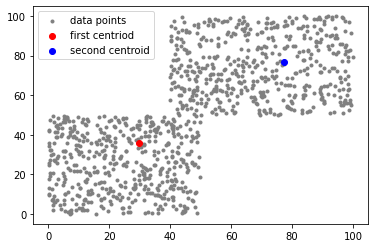

[[26.0306847295409, 28.642486394595153], [70.9902316516271, 75.85966678770265]]


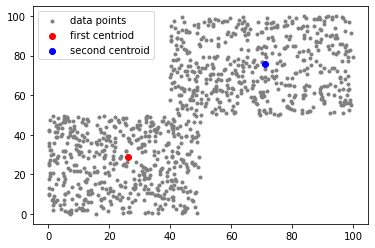

[[24.640897458751464, 26.568749917480332], [69.31594166657229, 74.7456687199099]]


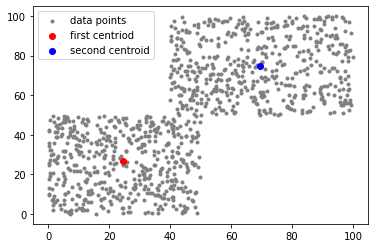

[[24.22574245889261, 26.031067669712307], [68.83734200362238, 74.32026169251083]]


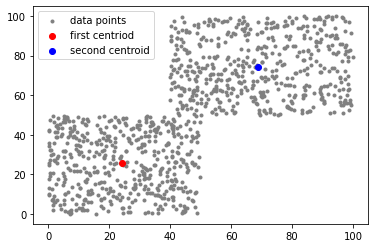

[[24.186802085962015, 25.976504170465926], [68.78703644709631, 74.27827195122754]]


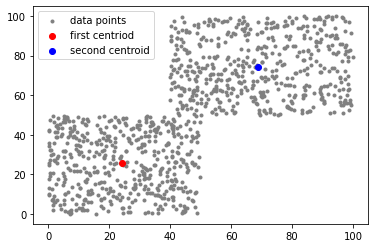

Implementation of KMeans,  random centroid:
 [[24.186802085962015, 25.976504170465926], [68.78703644709631, 74.27827195122754]]


In [8]:
#random centroids
centriods = KMeans_algo(X, k, "random")
print('Implementation of KMeans,  random centroid:\n', centriods)


# K-mean++ centriods and algo run

[array([31.48073523, 12.50304947])]
initial centroids  [array([31.48073523, 12.50304947]), array([96.22127208, 99.40190291])]
[[27.40693397438529, 30.060513679105206], [71.98629008160485, 76.94241675629671]]


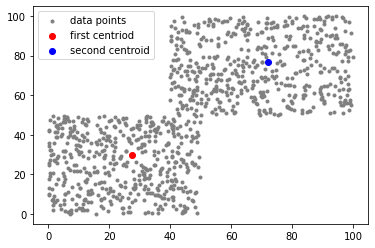

[[24.68743501664248, 26.61947755327327], [69.35865476104813, 74.79115874381267]]


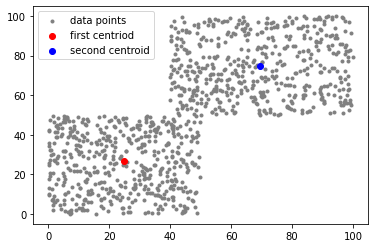

[[24.22574245889261, 26.031067669712307], [68.83734200362238, 74.32026169251083]]


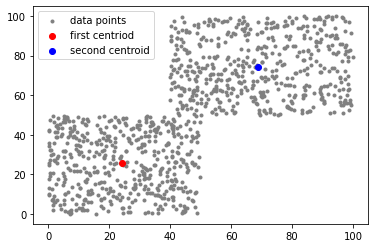

[[24.186802085962015, 25.976504170465926], [68.78703644709631, 74.27827195122754]]


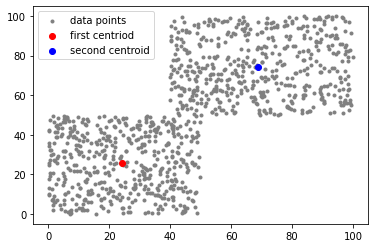

[[24.186802085962015, 25.976504170465926], [68.78703644709631, 74.27827195122754]]


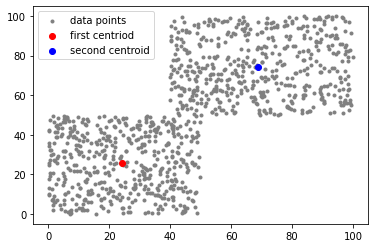

Implementation of KMeans,  k-mean++ centroid:
 [[24.186802085962015, 25.976504170465926], [68.78703644709631, 74.27827195122754]]


In [9]:
centriods = KMeans_algo(X, k, "k-mean++")
print('Implementation of KMeans,  k-mean++ centroid:\n', centriods)

## 

# Cross check the final centriod with bultin library

In [10]:
model = KMeans(n_clusters=k, init='random', random_state=0)
model.fit(X)
print('sklearn KMeans random centroid:\n', model.cluster_centers_)
model_2 = KMeans(n_clusters=k, init='k-means++', random_state=0)
model_2.fit(X)
print('sklearn KMeans k-means++ centroid:\n', model_2.cluster_centers_)

sklearn KMeans random centroid:
 [[24.18680209 25.97650417]
 [68.78703645 74.27827195]]
sklearn KMeans k-means++ centroid:
 [[24.18680209 25.97650417]
 [68.78703645 74.27827195]]
